In [1]:
# carbon emission analysis with K means clustering
#dataset 2 yrs age
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
df=pd.read_csv(r"C:\Users\Diksha\OneDrive\Desktop\CarbonEmissionIndia.csv")
df.head(28)

,States,per capita CO2 (kg per person),per capita CO (kg per person),per capita CH4 (kg per person)
0,Andhra Pradesh,974.17,27.18,16.97
1,Arunachal,405.90,17.43,25.82
2,Assam,340.91,16.63,21.29
3,Bihar,179.01,8.83,9.59
4,Chattisgarh,1963.88,17.56,22.37
5,Goa,2662.51,23.12,7.62
6,Gujarat,1310.58,24.01,12.26
7,Haryana,1381.86,17.90,21.57
8,Himachal Pradesh,784.16,16.98,18.28
9,Jammu & Kashmir,509.03,15.59,14.42


In [3]:
df.shape

(28, 4)

In [4]:
#as we have 28 rows and 4 columns.

In [5]:
df.columns

Index(['States', 'per capita CO2 (kg per person)',
       'per capita CO (kg per person)', 'per capita CH4 (kg per person)'],
      dtype='object')

In [6]:
df.describe()

,per capita CO2 (kg per person),per capita CO (kg per person),per capita CH4 (kg per person)
count,28.000000,28.000000,28.000000
mean,894.401071,18.293214,16.549286
std,547.619397,5.258928,6.599384
min,179.010000,8.830000,4.520000
25%,505.025000,14.847500,11.830000
50%,771.625000,17.495000,15.690000
75%,1058.092500,23.235000,20.232500
max,2662.510000,27.900000,33.380000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   States                          28 non-null     object 
 1   per capita CO2 (kg per person)  28 non-null     float64
 2   per capita CO (kg per person)   28 non-null     float64
 3   per capita CH4 (kg per person)  28 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.0+ KB


array([[<Axes: title={'center': 'per capita CO2 (kg per person)'}>,
        <Axes: title={'center': 'per capita CO (kg per person)'}>],
       [<Axes: title={'center': 'per capita CH4 (kg per person)'}>,
        <Axes: >]], dtype=object)

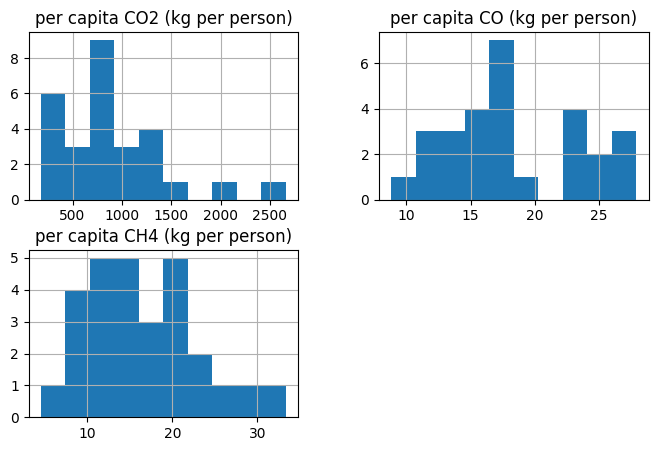

In [8]:
df.hist(figsize=(8,5))

In [9]:
df.isnull().sum()

States                            0
per capita CO2 (kg per person)    0
per capita CO (kg per person)     0
per capita CH4 (kg per person)    0
dtype: int64

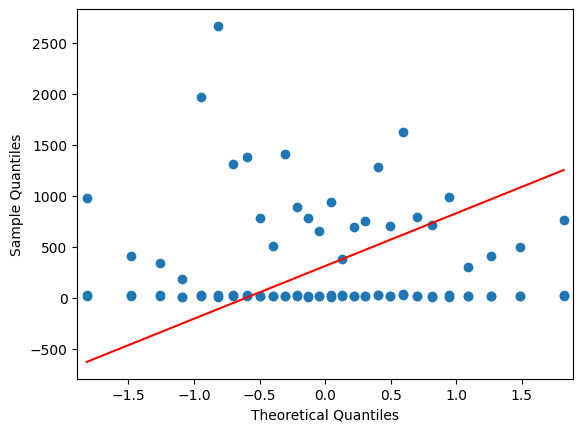

In [10]:
# Statsmodels(python library) allows users to explore data, estimate statistical models, and perform statistical tests.It 
# provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical 
#tests, and statistical data exploration.


from statsmodels.graphics.gofplots import qqplot

qqplot(df[['per capita CO2 (kg per person)','per capita CO (kg per person)', 'per capita CH4 (kg per person)']],line='s')
plt.show()

In [11]:
#function to calculate skewness of dataset. If skew = 0(:-data is normally distributed),s>0(more weight in left trial 
#of distribution),s<0(more wght in right trial of distribution)==formula=3(mean-median)/standard deviation

from scipy.stats import skew

print(skew(df[['per capita CO2 (kg per person)','per capita CO (kg per person)', 'per capita CH4 (kg per person)']]))

[1.42821594 0.2642628  0.55688343]


(28, 3)


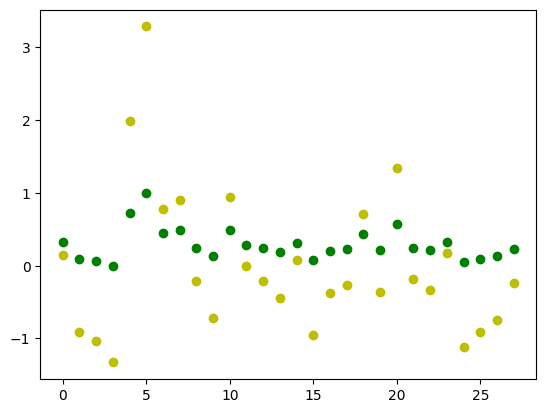

In [12]:
#Data is not following Normal/Gaussian Distribution.
#Needs to be scaled.(to bring data points that are far from each other closer => increase algo effectivness & speed up ml
#processing )
x=df[['per capita CO2 (kg per person)','per capita CO (kg per person)', 'per capita CH4 (kg per person)']]
y=df['States']

# Scaling Data using Min-Max Scaler

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X1 = mms.fit_transform(x)

# Scaling Data using Standard Scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
X2 = scaler.transform(x)

#comparing the scaled data

xx = np.arange(len(X2))
yminms= X1[:,0]
ystds= X2[:,0]
plt.scatter(xx,yminms,color='g')
plt.scatter(xx,ystds,color='y')

print(X2.shape)



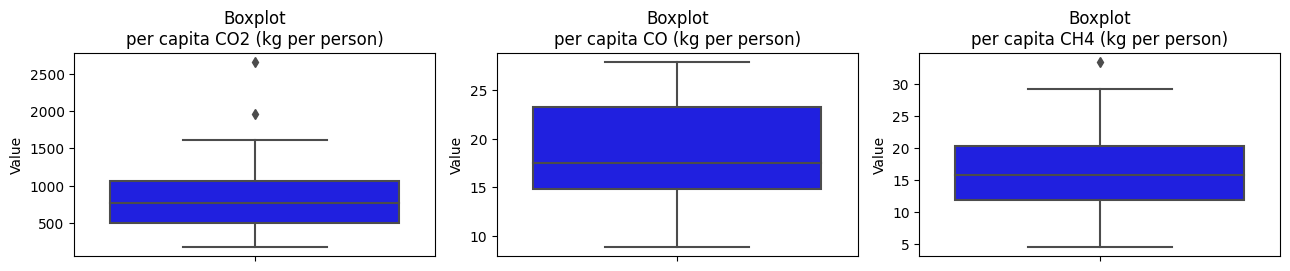

In [13]:
#how it worked
plt.figure(figsize=(13,5))

for feat, grd in zip(df[['per capita CO2 (kg per person)','per capita CO (kg per person)', 'per capita CH4 (kg per person)']],
                     range(231,237)):
    plt.subplot(grd)
    sns.boxplot(y=df[feat], color='blue')
    plt.ylabel('Value')
    plt.title('Boxplot\n%s'%feat)
plt.tight_layout()


In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split  

print(x.head())

model=KMeans(3)
model.fit(x,y)
ypred=model.predict(x)
print(" Y-Prediction =",ypred)#how it execute

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 0)  
y_pred=model.predict(xtest)
score=accuracy_score(ytest,y_pred)
print("Accuracy",score)#why accuracy score can't predicted in k means & why it gave 0.


   per capita CO2 (kg per person)  per capita CO (kg per person)  \
0                          974.17                          27.18   
1                          405.90                          17.43   
2                          340.91                          16.63   
3                          179.01                           8.83   
4                         1963.88                          17.56   

   per capita CH4 (kg per person)  
0                           16.97  
1                           25.82  
2                           21.29  
3                            9.59  
4                           22.37  


C:\Users\Diksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


 Y-Prediction = [0 1 1 1 2 2 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1]
Accuracy 0.0


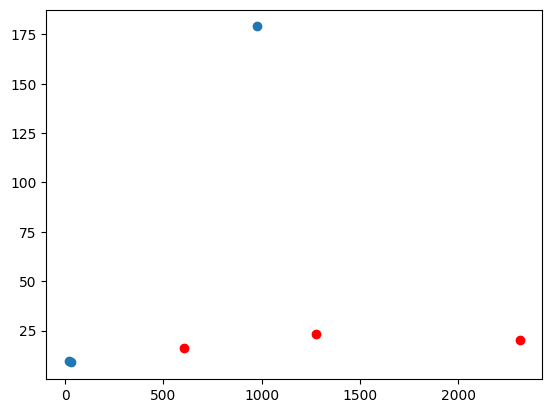

In [15]:
center=model.cluster_centers_#predefined function to give all the centroid points
plt.scatter(x.iloc[0],x.iloc[3])
plt.scatter(center[:,0],center[:,1],c='r')#why it taking only two data points & how code execute 

In [16]:
from sklearn.datasets import make_blobs
x,y=make_blobs(n_samples=500,n_features=3,centers=2)

C:\Users\Diksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


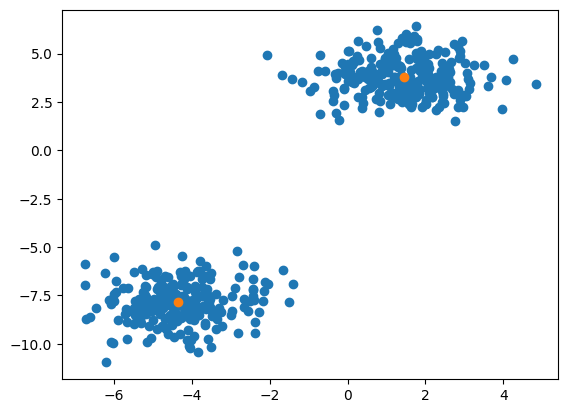

In [17]:
kmodel=KMeans(2)
kmodel.fit(x)
ypred=kmodel.predict(x)
center=kmodel.cluster_centers_
plt.scatter(x[:,0],x[:,1])
plt.scatter(center[:,0],center[:,1])
plt.show()#how it works

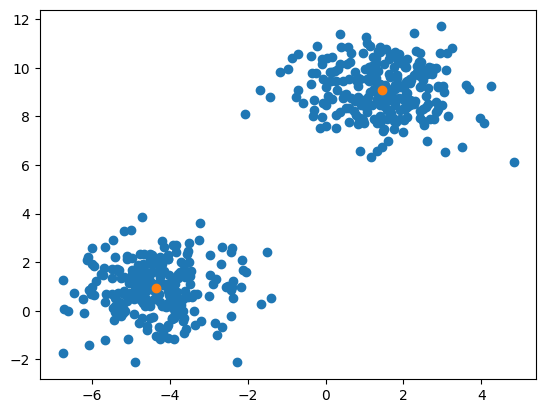

In [18]:
plt.scatter(x[:,0],x[:,2])
plt.scatter(center[:,0],center[:,2])
plt.show()#how it works

[[ 3.6256248   3.6256248   3.6256248 ]
 [-5.44083238 -5.44083238 -5.44083238]
 [ 3.09365232  3.09365232  3.09365232]]


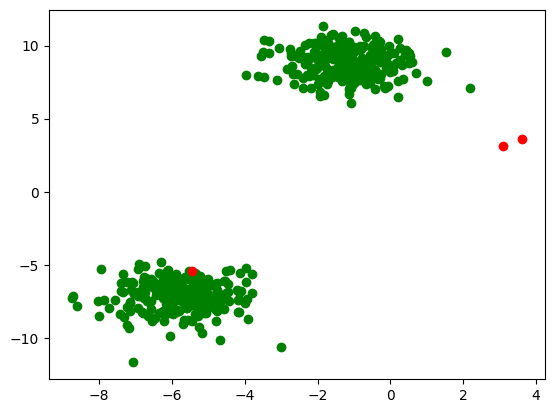

In [19]:
class kmeans:
    def __init__(self,x,num_cluster):
        self.k=num_cluster
        self.max_iter=100
        self.num_samples,self.num_features=x.shape
    def centroidinitialize(self,x):
        centroids=np.zeros((self.k,self.num_features))
        for k in range(self.k):#3 times
            centroid=x[np.random.choice(range(self.num_samples))]#546[12,34,54]
            centroids[k]=centroid
        return centroids
    def clustercreation(self,x,centroids):
        clusters=[[] for _ in range(self.k)]
        for pid,p in enumerate(x):
            closest_centroid=np.argmin(np.sqrt(np.sum((p-centroids)**2,axis=1)))#0,1,2
            clusters[closest_centroid].append(pid)
        return clusters
    def newcreation(self,cluster,x):
        centroids=np.zeros((self.k,self.num_features))
        for idx,cluster in enumerate(cluster):
                new_centroid=np.mean(x[cluster])
                centroids[idx]=new_centroid
        return centroids
    #[[3,6,4,87,8]]                                   
    def predict_cluster(self,clusters,x):
            y_pred=np.zeros(self.num_samples)
            for cidx,cluster in enumerate(clusters):
                #nvalues are the index of x array
                for j in cluster:#j is the index of array x
                    y_pred[j]=cidx
            return y_pred             
    def fit(self,x):
        centroids=self.centroidinitialize(x)#3[23,45,67]
        for i in range(self.max_iter):
            clusters=self.clustercreation(x,centroids)
            prev_centroid=centroids#[10,20,30]
            centroids=self.newcreation(clusters,x)
            differ=centroids-prev_centroid
            if(differ.any()):
                break
        y_pred=self.predict_cluster(clusters,x)
        print(centroids)
        plt.scatter(x[:,0],x[:,1],c='g')
        plt.scatter(centroids[:,0],centroids[:,1],c='r')
from sklearn.datasets import make_blobs
x,y=make_blobs(n_samples=500,n_features=3,centers=2)
km=kmeans(x,3)
km.fit(x)

In [20]:
# The main goal of Principal Component Analysis (PCA) is to reduce the dimensionality of a dataset while preserving the most
# important patterns or relationships between the variables without any prior knowledge of the target variables.
# PCA is used to reduce the dimensionality of a data set by finding a new set of variables, smaller than the original set of 
# variables, retaining most of the sample’s information, and useful for the regression and classification of data.

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X1)

In [21]:
from sklearn.cluster import KMeans

model1 = KMeans(random_state=21,n_clusters=3)
model1.fit(X_pca)

C:\Users\Diksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=21)

In [22]:
# In machine learning, a label is an identifying element that explains what a piece of data is. It is the thing we’re 
# predicting,or the target we want our machine learning model to predict. If you have labeled data, that means your data is 
# marked up or annotated to show the target. Data labeling can refer to tasks that include data tagging, annotation, 
# classification, moderation,transcription, or processing.

model1.labels_

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0,
       0, 1, 0, 0, 0, 1])

In [23]:
k1=model1.cluster_centers_
k1


array([[-0.21451507,  0.01945071],
       [ 0.28404329, -0.12960032],
       [ 0.54518331,  0.41787041]])

In [24]:
s = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)#use of random state
    kmeans.fit(X_pca)
    s.append(kmeans.inertia_)#working

C:\Users\Diksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Diksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Diksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Diksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

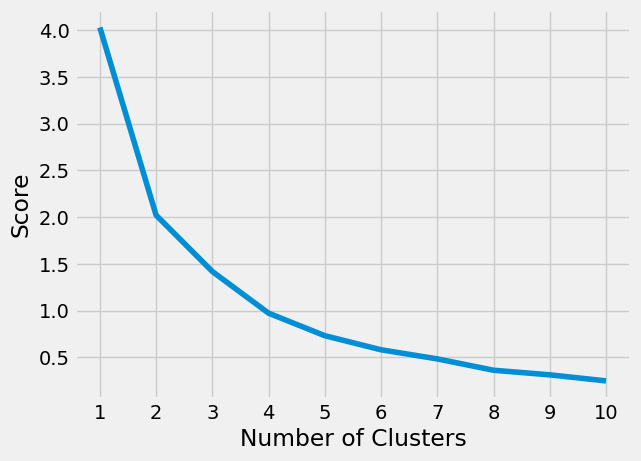

In [25]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), s)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.show()


In [26]:
pip install kneed

In [27]:
from kneed import KneeLocator
kl = KneeLocator(range(1,11),s,curve="convex",direction="decreasing")
kl.elbow

4